In [1]:
import pandas as pd

In [2]:
cdf = pd.read_csv("Compiled Datasets.csv", thousands=',')
cdf.head(40)
cdf = cdf.rename({"State" : "STATE/UT"}, axis = 1)
cdf["STATE/UT"] = cdf["STATE/UT"].str.upper()

In [3]:
df_cm_2009 = pd.read_csv("Updated_CM_2009.csv")
df_2009 = pd.read_csv("Updated_Crime_2009.csv")

In [4]:
df_cm_2009.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)

In [5]:
df_cm_2009.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2009["State_Name"] = df_cm_2009["State_Name"].str.upper()
df_cm_2009 = df_cm_2009.rename({"State_Name" : "STATE/UT"}, axis = 1)
# df_cm_2009.head(100)

In [6]:
result_2009 = pd.merge(df_2009, df_cm_2009, how='inner', on='STATE/UT')
result_2009 = pd.merge(result_2009, cdf, how='inner', on='STATE/UT')
# result_2009.head(40)

In [7]:
result_2009["STATE/UT"] = result_2009["STATE/UT"] + "_" + result_2009["Party"]

In [8]:
result_2009.sort_values(by=["GraveCrimeRatio"], inplace=True)
# result_2009.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])

In [9]:
df_cm_2010 = pd.read_csv("Updated_CM_2010.csv")
df_2010 = pd.read_csv("Updated_Crime_2010.csv")
df_cm_2010.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)
df_cm_2010.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2010["State_Name"] = df_cm_2010["State_Name"].str.upper()
df_cm_2010 = df_cm_2010.rename({"State_Name" : "STATE/UT"}, axis = 1)
result_2010 = pd.merge(df_2010, df_cm_2010, how='inner', on='STATE/UT')
result_2010 = pd.merge(result_2010, cdf, how='inner', on='STATE/UT')
result_2010["STATE/UT"] = result_2010["STATE/UT"] + "_" + result_2010["Party"]
result_2010.sort_values(by=["GraveCrimeRatio"], inplace=True)
# result_2010.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])

In [10]:
# result_2010 = pd.merge(result_2010, cdf, how='inner', on='STATE/UT')
# result_2010.head(40)

In [11]:
df_cm_2011 = pd.read_csv("Updated_CM_2011.csv")
df_2011 = pd.read_csv("Updated_Crime_2011.csv")
df_cm_2011.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)
df_cm_2011.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2011["State_Name"] = df_cm_2011["State_Name"].str.upper()
df_cm_2011 = df_cm_2011.rename({"State_Name" : "STATE/UT"}, axis = 1)
result_2011 = pd.merge(df_2011, df_cm_2011, how='inner', on='STATE/UT')
result_2011 = pd.merge(result_2011, cdf, how='inner', on='STATE/UT')
result_2011["STATE/UT"] = result_2011["STATE/UT"] + "_" + result_2011["Party"]
result_2011.sort_values(by=["GraveCrimeRatio"], inplace=True)
# result_2011.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])

<AxesSubplot:ylabel='STATE/UT'>

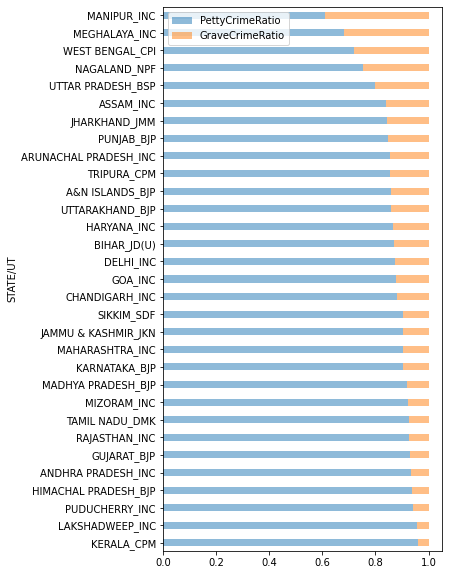

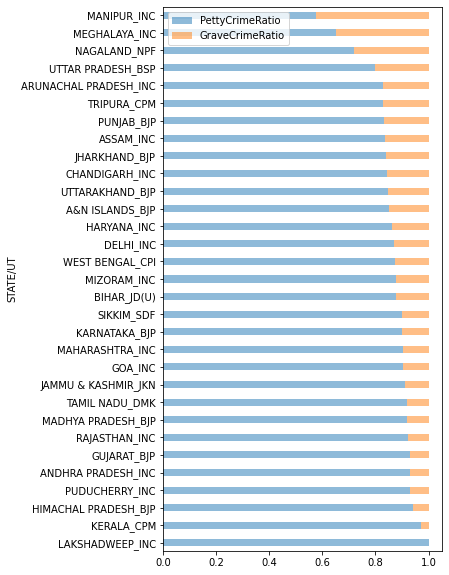

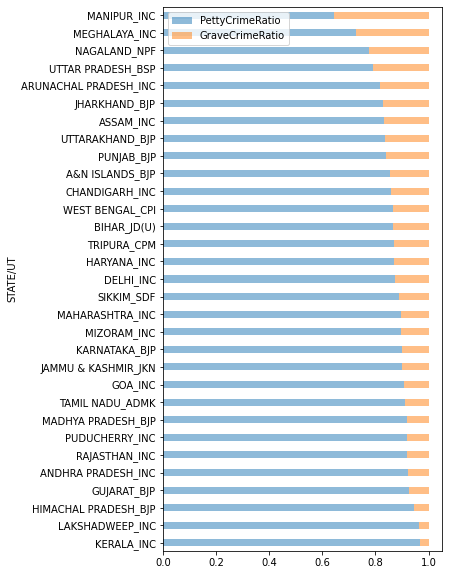

In [12]:
result_2009.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])
result_2010.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])
result_2011.plot.barh(x='STATE/UT', y=["PettyCrimeRatio", "GraveCrimeRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[5, 10])

In [13]:
result_2011["POPULATION 2011"] = pd.to_numeric(result_2011["POPULATION 2011"])

<AxesSubplot:ylabel='STATE/UT'>

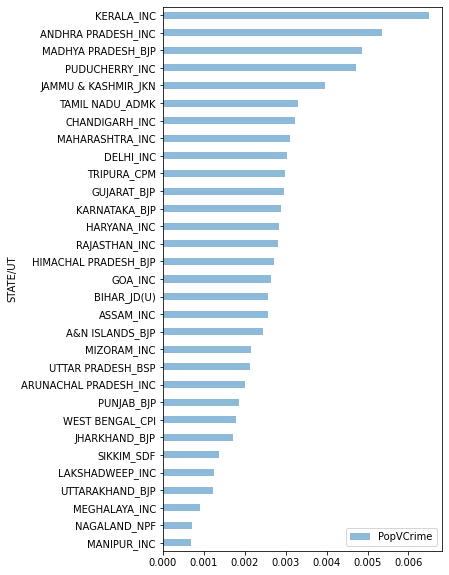

In [16]:
result_2011["PopVCrime"] = result_2011["TotalCrimes"]/result_2011["POPULATION 2011"]
result_2011.sort_values(by=["PopVCrime"], inplace=True)
result_2011.plot.barh(x='STATE/UT', y="PopVCrime",  width = 0.4,alpha=0.5, figsize=[5, 10], sort_columns=True)

it is interesting to note that the state which have a high grave crime ratio are the ones with low pop vs crime ratio

<AxesSubplot:ylabel='STATE/UT'>

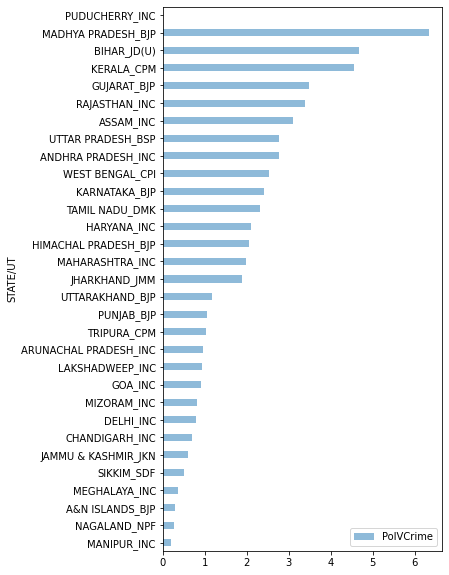

In [20]:
result_2009["PolVCrime"] = result_2009["TotalCrimes"]/result_2009["2,009.00"]
result_2009.sort_values(by=["PolVCrime"], inplace=True)
result_2009.plot.barh(x='STATE/UT', y="PolVCrime",  width = 0.4,alpha=0.5, figsize=[5, 10], sort_columns=True)

<AxesSubplot:ylabel='STATE/UT'>

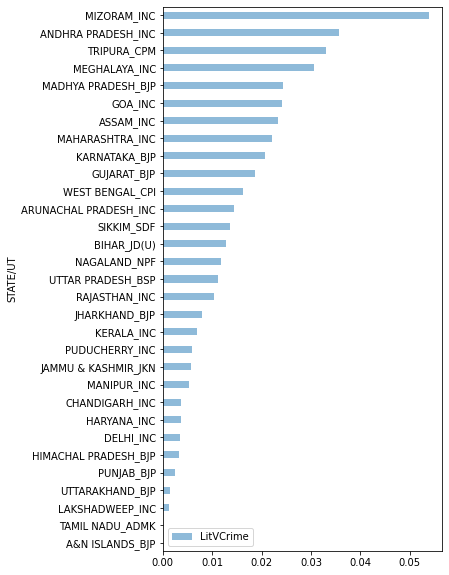

In [21]:
result_2011['LitVCrime'] = result_2011['PopVCrime']/result_2011['2011 % of LR']
result_2011.sort_values(by=["LitVCrime"], inplace=True)
result_2011.plot.barh(x='STATE/UT', y="LitVCrime",  width = 0.4,alpha=0.5, figsize=[5, 10], sort_columns=True)